# Data Preprocessing

In [1]:
from pyhealth.datasets import MIMIC3Dataset

dataset = MIMIC3Dataset(
    root='data/',
    tables=["DIAGNOSES_ICD","PROCEDURES_ICD","NOTEEVENTS_ICD","PRESCRIPTIONS"],
    code_mapping={"NDC": ("ATC", {"target_kwargs": {"level": 3}})}
)

In [2]:
dataset.stat()


Statistics of base dataset (dev=False):
	- Dataset: MIMIC3Dataset
	- Number of patients: 46520
	- Number of visits: 58976
	- Number of visits per patient: 1.2678
	- Number of events per visit in DIAGNOSES_ICD: 11.0384
	- Number of events per visit in PROCEDURES_ICD: 4.0711
	- Number of events per visit in NOTEEVENTS_ICD: 0.0026
	- Number of events per visit in PRESCRIPTIONS: 87.1287



'\nStatistics of base dataset (dev=False):\n\t- Dataset: MIMIC3Dataset\n\t- Number of patients: 46520\n\t- Number of visits: 58976\n\t- Number of visits per patient: 1.2678\n\t- Number of events per visit in DIAGNOSES_ICD: 11.0384\n\t- Number of events per visit in PROCEDURES_ICD: 4.0711\n\t- Number of events per visit in NOTEEVENTS_ICD: 0.0026\n\t- Number of events per visit in PRESCRIPTIONS: 87.1287\n'

In [7]:
# get patient dictionary
patient_dict = dataset.patients
print(list(patient_dict.keys()))
print(len(patient_dict))

['10', '100', '1000', '10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10008', '10009', '1001', '10010', '10011', '10012', '10013', '10014', '10015', '10016', '10017', '10019', '1002', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '1003', '10030', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '1004', '10040', '10041', '10042', '10043', '10044', '10045', '10046', '10047', '10048', '10049', '1005', '10050', '10051', '10052', '10054', '10055', '10056', '10057', '10058', '10059', '1006', '10060', '10061', '10062', '10063', '10064', '10065', '10066', '10067', '10068', '10069', '1007', '10071', '10072', '10073', '10074', '10075', '10076', '10077', '10079', '1008', '10080', '10081', '10082', '10083', '10084', '10085', '10086', '10087', '10088', '10089', '1009', '10090', '10091', '10092', '10093', '10094', '10096', '10097', '10098', '10099', '101', '1010', '10100', '10101', '10102', '10103', '10104', 

In [6]:
# get the "10" patient
patient = patient_dict["19547"]
patient.gender, patient.birth_datetime, patient.ethnicity, patient.death_datetime, patient.visits
print(patient.visits)

OrderedDict([('106062', Visit 106062 from patient 19547 with 131 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'NOTEEVENTS_ICD', 'PRESCRIPTIONS']), ('127546', Visit 127546 from patient 19547 with 106 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'NOTEEVENTS_ICD', 'PRESCRIPTIONS']), ('138551', Visit 138551 from patient 19547 with 89 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'NOTEEVENTS_ICD', 'PRESCRIPTIONS'])])


In [7]:
# get the visit list of this patient
visit_dict = patient.visits
print (list(visit_dict.keys()))

['106062', '127546', '138551']


In [8]:
# get the first visit
visit = visit_dict['138551']
visit.encounter_time, visit.available_tables, visit.num_events, visit.event_list_dict

(datetime.datetime(2152, 3, 28, 15, 39),
 ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'NOTEEVENTS_ICD', 'PRESCRIPTIONS'],
 89,
 {'DIAGNOSES_ICD': [Event with ICD9CM code 5781 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5849 from table DIAGNOSES_ICD,
   Event with ICD9CM code 2869 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5990 from table DIAGNOSES_ICD,
   Event with ICD9CM code 2851 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4439 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4019 from table DIAGNOSES_ICD,
   Event with ICD9CM code 25000 from table DIAGNOSES_ICD,
   Event with ICD9CM code V5861 from table DIAGNOSES_ICD,
   Event with ICD9CM code 73300 from table DIAGNOSES_ICD,
   Event with ICD9CM code 0414 from table DIAGNOSES_ICD],
  'PROCEDURES_ICD': [Event with ICD9PROC code 4513 from table PROCEDURES_ICD,
   Event with ICD9PROC code 9907 from table PROCEDURES_ICD,
   Event with ICD9PROC code 9904 from table PROCEDURES_ICD,
   Event with ICD9PROC code 3891 fr

In [9]:
visit.get_code_list(table='NOTEEVENTS_ICD')


['V419',
 '2724',
 '7993',
 '78079',
 '5990',
 '78652',
 '78791',
 '56409',
 '7892',
 '7821',
 '7823',
 '2800',
 '5789',
 '2869',
 '4439',
 '78702',
 '7295']

In [10]:
visit.get_code_list('NOTEEVENTS_ICD')

['V419',
 '2724',
 '7993',
 '78079',
 '5990',
 '78652',
 '78791',
 '56409',
 '7892',
 '7821',
 '7823',
 '2800',
 '5789',
 '2869',
 '4439',
 '78702',
 '7295']

In [2]:
from pyhealth.tasks import drug_recommendation_mimic3_fn

mimic3sample = dataset.set_task(task_fn=drug_recommendation_mimic3_fn) # use default task



Generating samples for drug_recommendation_mimic3_fn: 100%|██████████| 46520/46520 [00:01<00:00, 27196.24it/s]


In [3]:
mimic3sample.samples

[{'visit_id': '163687',
  'patient_id': '19544',
  'conditions': [['56985',
    '5849',
    '4280',
    '42731',
    '5859',
    '42820',
    '2851',
    '53540',
    '40390',
    '25040',
    '25060',
    '3572',
    '25050',
    '36201',
    '412',
    'V1251',
    'V4581',
    'V152',
    'V151']],
  'procedures': [['4513']],
  'drugs': ['N02B',
   'A10A',
   'A02B',
   'C07A',
   'C10A',
   'N06A',
   'S01E',
   'A05A',
   'C04A',
   'S03A',
   'S01X',
   'A06A',
   'B01A',
   'N02A',
   'C05A',
   'D09A',
   'R06A',
   'N05C',
   'C03C',
   'B05B',
   'C05B',
   'N05B',
   'B05X',
   'N04A'],
  'drugs_hist': [[]],
  'symptoms': [['V419',
    '4439',
    '3579',
    '3629',
    '2809',
    '4241',
    '74722',
    '74710',
    '6959',
    '4549',
    '2800',
    '2859',
    '7821',
    '5859',
    '4019',
    '311',
    '29630']]},
 {'visit_id': '180092',
  'patient_id': '19544',
  'conditions': [['56985',
    '5849',
    '4280',
    '42731',
    '5859',
    '42820',
    '2851',
  

### Preprocessing Noteveevents

In [68]:
import pandas as pd

table = "NOTEEVENTS"

# read table
df = pd.read_csv(
    "data/NOTEEVENTS.csv",
    dtype={"SUBJECT_ID": str, "HADM_ID": str, "CATEGORY": str,"CHARTDATE": str, "TEXT": str},
    parse_dates=["CHARTDATE"],
    infer_datetime_format=True
)


C:\Users\AR\AppData\Local\Temp\ipykernel_19148\2530625872.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [69]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
2083175,2070657,31097,115637,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,2070658,31097,115637,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,2070659,31097,115637,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,2070660,31097,115637,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


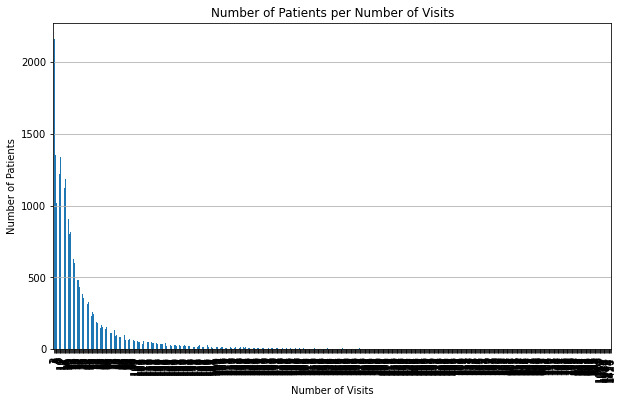

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of visits per patient
visit_counts = df.groupby('SUBJECT_ID').size()

# Count the number of patients per visit count
patients_per_visit_count = visit_counts.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
patients_per_visit_count.plot(kind='bar')
plt.title('Number of Patients per Number of Visits')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Patients')
plt.grid(axis='y')

# Show the plot
plt.show()

In [71]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
2083175,2070657,31097,115637,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,2070658,31097,115637,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,2070659,31097,115637,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,2070660,31097,115637,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


In [76]:
# filter for 'DISCHARGE SUMMARY' in the 'CATEGORY' column
df = df[(df['CATEGORY'] == 'Discharge summary') & (df['DESCRIPTION'] == 'Report')]
# Filtra per avere solo i record che appartengono ai pazienti in patient_dict
df = df[df["SUBJECT_ID"].isin(list(patient_dict.keys()))]
# Elimina le righe con valori mancanti
df = df.dropna(subset=["SUBJECT_ID", "HADM_ID", "TEXT"])
# Raggruppa per paziente
group_df = df.groupby("SUBJECT_ID")

In [77]:
df

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
55970,53613,43691,147266,2147-03-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-2-25**] ...
55971,53614,80847,129802,2190-06-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2190-5-13**] ...
55972,53615,41074,182558,2121-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2121-6-13**] ...
55973,53616,76397,184741,2182-04-22,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2182-4-19**] ...


In [78]:
# Calcola il numero di visite (riepiloghi di dimissione) per ogni paziente
visits_per_patient = group_df['HADM_ID'].nunique()
# Filtra i pazienti che hanno almeno 3 visite
patients_with_at_least_two_visits = visits_per_patient[visits_per_patient >= 3].index
# Crea un nuovo DataFrame contenente solo i pazienti con almeno 3 visite
df_multiple_visits = df[df["SUBJECT_ID"].isin(patients_with_at_least_two_visits)]
# Resetta l'indice del nuovo DataFrame
df_multiple_visits = df_multiple_visits.reset_index(drop=True)

In [80]:
df_multiple_visits

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
1,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
2,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
3,185,1136,139574,2192-05-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2192-4-19**] ...
4,186,1136,186931,2194-05-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2194-5-8**] D...
...,...,...,...,...,...,...,...,...,...,...,...
9485,53577,72073,121411,2159-05-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-4-30**] ...
9486,53578,72073,113302,2159-08-17,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-7-27**] ...
9487,53579,72073,110136,2161-12-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2161-12-22**] ...
9488,53600,9768,157881,2198-02-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2198-2-5**] Discharge ...


In [81]:
df_multiple_visits.set_index("ROW_ID", inplace=True)

In [82]:
df_multiple_visits

,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
ROW_ID,,,,,,,,,,
175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
185,1136,139574,2192-05-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2192-4-19**] ...
186,1136,186931,2194-05-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2194-5-8**] D...
...,...,...,...,...,...,...,...,...,...,...
53577,72073,121411,2159-05-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-4-30**] ...
53578,72073,113302,2159-08-17,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2159-7-27**] ...
53579,72073,110136,2161-12-31,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2161-12-22**] ...


In [ ]:
"""
# Define the ranges for subject IDs
ranges = [(10000, 20000), (20000, 30000), (30000, 40000)]

# Filter 5 patients from each range
selected_patients = []
for start, end in ranges:
    patients_in_range = df[(df['SUBJECT_ID'].astype(int) > start) & (df['SUBJECT_ID'].astype(int) <= end)]
    selected_patients.extend(patients_in_range.sample(5).to_dict('records'))

# Convert the list of dicts to a dataframe
selected_patients_df = pd.DataFrame(selected_patients)
"""


In [ ]:
"""
selected_patients_list = selected_patients_df['SUBJECT_ID'].tolist()
selected_patients_list
"""

In [ ]:
#filtered_noteevents_df = df[df['SUBJECT_ID'].isin(selected_patients_list)]

In [ ]:
#unique_subject_ids = noteevents_df['SUBJECT_ID'].unique()[:10]
#filtered_noteevents_df = noteevents_df[noteevents_df['SUBJECT_ID'].isin(unique_subject_ids)]

In [11]:
from medcat.cat import CAT
from medcat.cdb import CDB
from medcat.vocab import Vocab
from medcat.meta_cat import MetaCAT

c:\Users\AR\AppData\Local\Programs\Python\Python310\lib\site-packages\medcat\cat.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [12]:
DATA_DIR = "./data_umls/"
vocab_path = DATA_DIR + "vocab.dat"
cdb_path = DATA_DIR + "cdb.dat"

In [13]:
# Create and load the CDB (Concept Database)
cdb = CDB.load(cdb_path)

# Create and load the Vocabulary
vocab = Vocab.load(vocab_path)

# Load model for MetaAnnotations (optional)
mc_status = MetaCAT.load("./data_umls/meta_Status/")

In [14]:
# Create CAT - the main class from medcat used for concept annotation
cat = CAT(cdb=cdb, config=cdb.config, vocab=vocab, meta_cats=[mc_status])

c:\Users\AR\AppData\Local\Programs\Python\Python310\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'en_core_web_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [15]:
# Detect only the following entity:
    # bpoc|T023|Body Part, Organ, or Organ Component
    # lbtr|T034|Laboratory or Test Result
    # patf|T046|Pathologic Function
    # dsyn|T047|Disease or Syndrome
    # mobd|T048|Mental or Behavioral Dysfunction
    # lbpr|T059|Laboratory Procedure
    # diap|T060|Diagnostic Procedure
    # topp|T061|Therapeutic or Preventive Procedure
    # phsu|T121|Pharmacologic Substance ---> SE LO AGGIUNGO MI METTE ANCHE ALTRA ROBA TIPO VITAMINE, ENZIMI, ETC.
    # sosy|T184|Sign or Symptom

type_ids_filter = ['T047','T048','T184']
cui_filters = set()
for type_ids in type_ids_filter:
    cui_filters.update(cat.cdb.addl_info['type_id2cuis'][type_ids])
cat.cdb.config.linking['filters']['cuis'] = cui_filters

In [16]:
color_dict = {
    'Body Part, Organ, or Organ Component': '#FFCE80',  # Arancione pastello
    'Laboratory or Test Result': '#FFF9C4',             # Giallo chiaro
    'Disease or Syndrome': '#B5EAD7',                   # Verde acqua chiaro
    'Mental or Behavioral Dysfunction': '#F0B2FF',      # Viola pastello
    'Laboratory Procedure': '#D0D9FF',                  # Blu chiaro
    'Diagnostic Procedure': '#FFD9EC',                  # Rosa chiaro
    'Therapeutic or Preventive Procedure': '#C4FFFF',   # Azzurro chiaro
    'Pharmacologic Substance': '#FFDAB9',               # Pesca pastello
    'Sign or Symptom': '#FFC4F3',                       # Magenta chiaro
    'Pathologic Function': '#B5EAD7'                    # Verde acqua chiaro
}

In [ ]:
import sys

entities_lemma = []
total_rows = len(df)

for i, row in enumerate(df.index):
    ner = cat.get_entities(df['TEXT'][row])
    ner['row_id'] = row
    ner['subject_id'] = df['SUBJECT_ID'][row]
    ner['hadm_id'] = df['HADM_ID'][row]
    entities_lemma.append(ner)

    # Calcolo della percentuale di completamento
    percent_complete = ((i + 1) / total_rows) * 100
    # Stampa la percentuale di completamento sovrascrivendo la linea corrente
    sys.stdout.write(f"\rCompletato: {percent_complete:.2f}%")
    sys.stdout.flush()

In [84]:
entities_lemma

[{'entities': {11: {'pretty_name': 'Dyspnea',
    'cui': 'C0013404',
    'type_ids': ['T184'],
    'types': ['Sign or Symptom'],
    'source_value': 'Dyspnea',
    'detected_name': 'dyspnea',
    'acc': 0.7845305305934716,
    'context_similarity': 0.7845305305934716,
    'start': 262,
    'end': 269,
    'icd10': [{'chapter': 'R06.0', 'name': 'Dyspnoea'},
     {'chapter': 'R06.00', 'name': 'Dyspnea, unspecified'},
     {'chapter': 'R06.02', 'name': 'Shortness of breath'}],
    'ontologies': [],
    'snomed': ['S-139192008',
     'S-139200001',
     'S-139201002',
     'S-139207003',
     'S-158371003',
     'S-158379001',
     'S-161937008',
     'S-161945003',
     'S-161946002',
     'S-161951008',
     'S-207057006',
     'S-207059009',
     'S-207062007',
     'S-230145002',
     'S-267036007',
     'S-308149007',
     'S-49233005'],
    'id': 11,
    'meta_anns': {'Status': {'value': 'Affirmed',
      'confidence': 0.9999895095825195,
      'name': 'Status'}}},
   13: {'pretty_na

In [87]:
!pip install icd-mappings


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for icd-mappings from https://files.pythonhosted.org/packages/c8/d5/cae5a0299358f31b4adef78ba89df0249cc079e2172b9fea3bc37cbce9ee/icd_mappings-0.3.5-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources<6.0.0,>=5.12.0 from https://files.pythonhosted.org/packages/7a/68/bd9dd6bbf06772c7accce77d0354d783333fbe712a60b08fc13540c05422/importlib_resources-5.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 2.6/2.6 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 6.0.1
    Uninstalling importlib-resources-6.0.1:
      Successfully uninstalled importlib-resources-6.0.1


In [ ]:
from icdmappings import Mapper

mapper = Mapper()

# Example data structure for the dataframe
df_structure = {
    'ROW_ID': [],
    'SUBJECT_ID': [],
    'HADM_ID': [],
    'SEQ_NUM': [],
    #'ICD10_CODE': [],
    'ICD9_CODE': []
}

# Process the data to extract needed information
for record in entities_lemma:
    row_id = record['row_id']
    subject_id = record['subject_id']
    hadm_id = record['hadm_id']
    entities = record['entities']
    seq_num = 1  # Reset sequence number for each record

    for entity_id, entity in sorted(entities.items()):
        # Read ICD-10 information, if available
        icd10_info = entity.get('icd10', [])
        
        # If ICD-10 information is not empty, append data to the structure
        if icd10_info:
            for icd10 in icd10_info:
                # icd9 to icd10
                # Remove the period from the ICD-10 code
                icd10code_cleaned = icd10['chapter'].replace('.', '')
                icd9 = mapper.map(icd10code_cleaned, source='icd10', target='icd9')
                if icd9:
                    df_structure['ROW_ID'].append(row_id)
                    df_structure['SUBJECT_ID'].append(subject_id)
                    df_structure['HADM_ID'].append(hadm_id)
                    df_structure['SEQ_NUM'].append(seq_num)
                    #df_structure['ICD10_CODE'].append(icd10['chapter'])  # Using ICD-10 'chapter' as a placeholder for ICD-9 code
                    df_structure['ICD9_CODE'].append(icd9)  # Using ICD-10 'chapter' as a placeholder for ICD-9 code
                    seq_num += 1  # Increment SEQ_NUM only if icd10_info is not empty
                else:
                    break
            
# Create the dataframe
noteevents_df = pd.DataFrame(df_structure)

In [ ]:
noteevents_df.to_csv('data/NOTEEVEENTS_ICD.csv', sep=",", index=False, header=True)